# Homework 3

[We have seen this data before – No need to explore the data for this exercise]

a)	We would like to perform a predictive modeling analysis on this same dataset using the a) decision tree, b) the k-NN technique and c) the logistic regression technique. Using the nested cross-validation technique, try to optimize the parameters of your classifiers in order to improve the performance of your classifiers (i.e., f1-score) as much as possible. Please make sure to always use a random state of “42” whenever applicable. What are your optimal parameters and what is the corresponding performance of these classifiers? Please provide screenshots of your code and explain the process you have followed.

[part a is worth 25 points in total:

7 points for correctly optimizing at least two parameters for the Decision Tree and providing screenshots/explaining what you are doing and the corresponding results

7 points for correctly optimizing at least two parameters for the kNN and providing screenshots/explaining what you are doing and the corresponding results

7 points for correctly optimizing at least two parameters for the Logistic Regression and providing screenshots/explaining what you are doing and the corresponding results

4 points for contrasting their performance of all three algorithms and discussing which one would you prefer to use – justify why it is the case


## Data Import & Prep

In [1]:
# To write a Python 2/3 compatible codebase, the first step is to add this line to the top of each module
from __future__ import division, print_function, unicode_literals
from IPython.display import Image
from sklearn import linear_model, neighbors, datasets, metrics, tree        # The sklearn.linear_model module implements generalized linear models. LR is part of this module
from sklearn.linear_model import LogisticRegression # Logistic regression classifier class
from matplotlib.colors import ListedColormap # Learn more about matplotlib.colors here https://matplotlib.org/3.1.1/api/colors_api.html
import matplotlib.pyplot as plt #pyplot is matplotlib's plotting framework https://matplotlib.org/users/pyplot_tutorial.html
import matplotlib
import scipy as sp # sp is an alias pointing to scipy
import numpy as np
import pandas as pd # pd is an alias point to pandas
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, GridSearchCV, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder 
# StandardScaler Standardize features by removing the mean and scaling to unit variance
# LabelEncoder Encode labels with value between 0 and n_classes-1
# Cross_val_score Evaluate a score by cross-validation

# The sklearn.metrics module includes score functions, performance metrics and pairwise metrics 
# and distance computations.
# https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics
#----------
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, cohen_kappa_score,  roc_curve, auc
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
# If you don't have graphviz package, you need to install it https://anaconda.org/anaconda/graphviz
# How to install Graphviz with Anaconda 1
# conda install -c anaconda graphviz 
!pip install graphviz
import itertools
import graphviz
import os

# Seed the generator to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline

# Dynamically change the default rc settings in a python script
# See documentation for a complete list of parameters https://matplotlib.org/users/customizing.html
plt.rcParams['axes.labelsize'] = 14  # fontsize of the x any y labels
plt.rcParams['xtick.labelsize'] = 12 # fontsize of the tick labels
plt.rcParams['ytick.labelsize'] = 12 # fontsize of the tick labels
#-----------------
# Matplotlib inline allows the output of plotting commands will be displayed inline
%matplotlib inline    

# Root Directory
PROJECT_ROOT_DIR = "C:\\Users\\carlj\\OneDrive\\Documents\\School-MSBA\\Classes\\Fall\\Intro. to Business Analytics\\HW3"

In [2]:
########################################### Imports ###########################################
hw2data = pd.read_csv("wdbc.data", header=None, names=["id","diagnosis","radius_mean","radius_stderror","radius_worst","texture_mean","texture_stderror","texture_worst","perimeter_mean","perimeter_stderror","perimeter_worst","area_mean","area_stderror","area_worst","smoothness_mean","smoothness_stderror","smoothness_worst","compactness_mean","compactness_stderror","compactness_worst","concavity_mean","concavity_stderror","concavity_worst","concavepoints_mean","concavepoints_stderror","concavepoints_worst","symmetry_mean","symmetry_stderror","symmetry_worst","fractaldimension_mean","fractaldimension_stderror","fractaldimension_worst"]) 
#hw2data.rename(columns={0:"id",1:"diagnosis"},inplace=True)

######################################### Isolating the Target Variable #########################################
# Retrieving Attributes
X = hw2data.iloc[:,2:].values
# Retriving Target Variable
y = hw2data.iloc[:,1].values

le = LabelEncoder()
#print(y)               #See label before transformation
y = le.fit_transform(y) #Labels 'M' as 1 and 'B' as 0
#print(y)               #See label after transformation
#print(le.classes_)      #Show the classes that have been encoded

################################# Split the Data into 70% training and 30% test ##################################
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

################### Standardize Training and Testing X using metrics from Training X #############################
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [5]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

## Parameter Tuning

In [3]:
##################################### Parameter Tuning ####################################
# Exhaustive search over specified parameter values for an estimator.
# GridSearchCV implements a “fit” and a “score” method. 
# It also implements “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” 
# if they are implemented in the estimator used.
# The parameters of the estimator used to apply these methods are optimized by cross-validated 
# grid-search over a parameter grid.

inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)#Interestingly both calls are the same but yield different results
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)#need to state random state 

### Decision Tree Parameter Tuning

In [66]:
############################## Decision Tree Parameter Tuning ##############################

# See all the parameters you can optimize here http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# Choosing optimal depth of the tree
# Choosing optimal depth of the tree AND optimal splitting criterion
# Choosing depth of the tree AND splitting criterion AND min_samples_leaf AND min_samples_split
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

gs_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6], 'criterion':['gini','entropy'], 
                              'min_samples_leaf':[1,2,3,4,5],
                              'min_samples_split':[2,3,4,5]}],
                  scoring='f1', # Specifying multiple metrics for evaluation
                  cv=inner_cv,
                  n_jobs=-1)

gs_dt = gs_dt.fit(X,y)
print("\nDecision Tree Parameter Tuning")
print("Non-nested CV F1-Score: ", gs_dt.best_score_)
print("Optimal Parameter: ", gs_dt.best_params_) # Parameter setting that gave the best results on the hold out data.
print("Optimal Estimator: ", gs_dt.best_estimator_) # Estimator that was chosen by the search, i.e. estimator which gave highest score
nested_score_gs_dt = cross_val_score(gs_dt, X=X, y=y, cv=outer_cv)
print("Nested CV F1-Score: ",nested_score_gs_dt.mean(), " +/- ", nested_score_gs_dt.std())


Decision Tree Parameter Tuning
Non-nested CV F1-Score:  0.934657984394364
Optimal Parameter:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Optimal Estimator:  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
Nested CV F1-Score:  0.9265708104408736  +/-  0.014452515617888772


### Logistic Regression Parameter Tuning

In [67]:
############################ Logistic Regression Parameter Tuning ############################
# Choosing C parameter (i.e., regularization parameter) for Logistic Regression
# Choosing C parameter for Logistic Regression AND type of penalty (ie., l1 vs l2)
# See other parameters here http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

gs_lr = GridSearchCV(estimator=LogisticRegression(random_state=42),
                  param_grid=[{'C': [ 0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000, 10000, 100000, 1000000, 10000000],
                             'penalty':['l1','l2']}],
                  scoring='f1',
                  cv=inner_cv)

gs_lr = gs_lr.fit(X,y)
print("\n Logistic Regression Parameter Tuning")
print("Non-nested CV F1-Score: ", gs_lr.best_score_)
print("Optimal Parameter: ", gs_lr.best_params_)
print("Optimal Estimator: ", gs_lr.best_estimator_)
nested_score_gs_lr = cross_val_score(gs_lr, X=X, y=y, cv=outer_cv)
print("Nested CV F1-Score:",nested_score_gs_lr.mean(), " +/- ", nested_score_gs_lr.std())


 Logistic Regression Parameter Tuning
Non-nested CV F1-Score:  0.9741332753342583
Optimal Parameter:  {'C': 0.1, 'penalty': 'l2'}
Optimal Estimator:  LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
Nested CV F1-Score: 0.9741006828434184  +/-  0.012735348788663165


### kNN Parameter Tuning

In [68]:
################################### kNN Parameter Tuning ###################################

#We Tune our parameters using the entire standardized X set
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

# Choosing k for kNN
# Choosing k for kNN AND type of distance
gs_knn = GridSearchCV(estimator=neighbors.KNeighborsClassifier( 
                           metric='minkowski'),
                  param_grid=[{'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
                               'weights':['uniform','distance'],'p':[1,2,3,4,5,6,7,8,9,10]}],
                  scoring='f1',
                  cv=inner_cv,
                  n_jobs=4)

#print(len(y))
gs_knn = gs_knn.fit(X,y)  #X_std
print("\n kNN Parameter Tuning")
print("Non-nested CV F1-Score: ", gs_knn.best_score_)
print("Optimal Parameter: ", gs_knn.best_params_)
print("Optimal Estimator: ", gs_knn.best_estimator_) # Estimator that was chosen by the search, i.e. estimator which gave highest score
nested_score_gs_knn = cross_val_score(gs_knn, X=X, y=y, cv=outer_cv)
print("Nested CV F1-Score: ",nested_score_gs_knn.mean(), " +/- ", nested_score_gs_knn.std())


 kNN Parameter Tuning
Non-nested CV F1-Score:  0.9574747147707873
Optimal Parameter:  {'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
Optimal Estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')
Nested CV F1-Score:  0.9464914636342086  +/-  0.03280761754947194


## Learning Curve

Points will not be deducted for not getting the highest possible results, but have to become very familiar with this

b)	Build and visualize a learning curve for the logistic regression technique (visualize the performance for both training and test data in the same plot). Please provide screenshots of your code and explain the process you have followed.
[part b is worth 25 points in total:

8 points for correct visualization of learning curve for in-sample sample performance – show the performance for 10 different sizes (10%,20%,30%)  - provide screenshots of your code and explain the process you have followed.

8 points for correct visualization of learning curve for out-sample sample performance – show the performance for 10 different sizes - provide screenshots of your code and explain the process you have followed.	

9 points for discussing what we can learn from this specific learning curve – what are the insights that can be drawn

- One learning curve with two lines


In [33]:
################################## Define function that plots Learning Curves ##################################

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10)): # np.linspace(.1, 1.0, 5) will return evenly
                                                                        # spaced 5 numbers from 0.1 to 1.0
                        # n_jobs is the number of CPUs to use to do the computation. 
# Visualization patamters
    plt.figure()                    #display figure
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples") #y label title
    plt.ylabel("F1 Score")             #x label title
    
    # Estimate train and test score for different training set sizes
    # Class learning_curve determines cross-validated training and test scores for different training set sizes
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes) # learning_curve Determines cross-validated 
                                                                        # training and test scores for different 
                                                                        # training set sizes.
    # Cross validation statistics for training and testing data (mean and standard deviation)
    # Estimate statistics of train and test scores (mean, std)
    train_scores_mean = np.mean(train_scores, axis=1) # Compute the arithmetic mean along the specified axis.
    train_scores_std = np.std(train_scores, axis=1)   # Compute the standard deviation along the specified axis.
    test_scores_mean = np.mean(test_scores, axis=1)   # Compute the arithmetic mean along the specified axis.
    test_scores_std = np.std(test_scores, axis=1)     # Compute the standard deviation along the specified axis.

    plt.grid() # Configure the grid lines

    # Fill the area around the mean scores with standard deviation info
    # and test data
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r") # train data performance indicated with red
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g") # test data performance indicated with green

    # Cross-validation means indicated by dots
    # Train data performance indicated with red
    # Visualization parameters that will allow us to distinguish train set scores from test set scores
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training Score (In-Sample)")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-Validation Score (Out-Sample)")

    plt.legend(loc="best") # Show legend of the plot at the best location possible
    return plt             # Function that returns the plot as an output

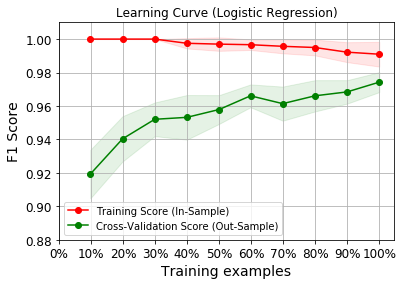

In [50]:
###################################### Plot Learning Curve for Logistic Regression #######################################

# Determines cross-validated training and test scores for different training set sizes
from sklearn.model_selection import learning_curve 
# Random permutation cross-validator
from sklearn.model_selection import ShuffleSplit
# Logistic regression classifier class
from sklearn.linear_model import LogisticRegression
# kNN classifier class
from sklearn import neighbors
# Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, 
# plots some lines in a plotting area, decorates the plot with labels, etc

title = "Learning Curve (Logistic Regression)"
# SVC is more expensive so we do a lower number of CV iterations:
# Class ShuffleSplit is a random permutation cross-validator
# Parameter n_splits = Number of re-shuffling & splitting iterations
# Parameter test_size = represents the proportion of the dataset to include in the test split (float between 0.0 and 1.0) 
# Parameter random_state = the seed used by the random number generator

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
estimator = LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
# Plots the learning curve based on the previously defined function for the logistic regression estimator
plot_learning_curve(estimator, title, X, y, (0.88, 1.01), cv=cv, n_jobs=4, train_sizes=np.linspace(.1, 1.0, 10))
plt.xticks(np.linspace(0, 398, 11), ('0%','10%', '20%', '30%', '40%', '50%','60%','70%','80%','90%','100%'))
plt.show() # Display the figure

## Fitting Graph

c)	Build a fitting graph for different depths of the decision tree (visualize the performance for both training and test data in the same plot). Please provide screenshots of your code and explain the process you have followed.
[part c is worth 25 points in total:

8 points for correct visualization of fitting graph for in-sample sample performance (training) – show the performance for 15 different values- provide screenshots of your code and explain the process you have followed

8 points for correct visualization of fitting graph for out-of-sample performance (test)– show the performance for 15 different values- provide screenshots of your code and explain the process you have followed

9 points for discussing what we can learn from this specific fitting graph – what are the insights that can be drawn] – imagine you are talking to another team, how would you describe the insights?




In [59]:
############################# Parameters - Varying Complexity #############################
# Specify possible depths for the tree.
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
# Compute scores for an estimator with different values of a specified parameter. 
# This is similar to grid search with one parameter. 
# However, this will also compute training scores and is merely a utility for plotting the results.

########################## Estimate Scores - Varying Complexity ##########################

# Determine training and test scores for varying parameter values.
train_scores, test_scores = validation_curve( 
                #estimator=DecisionTreeClassifier(random_state=42), #Build Logistic Regression Models
                estimator=DecisionTreeClassifier(class_weight=None, criterion='gini',
                max_features=None, max_leaf_nodes=None,
                min_impurity_decrease=0.0, min_impurity_split=None,
                min_samples_leaf=5, min_samples_split=2,
                min_weight_fraction_leaf=0.0, presort=False, random_state=42,
                splitter='best'),
                X=X, #X=X because we are testing the model and not optimizing
                y=y, #
                param_name="max_depth", # parameter C: Inverse of regularization strength; must be a positive float. Smaller values of paramter C specify stronger regularization.
                param_range=param_range,
                cv=5,     #5-fold cross-validation
                scoring="f1", 
                n_jobs=4) # Number of CPU cores used when parallelizing over classes if multi_class=’ovr’”. This parameter is ignored when the ``solver``is set to ‘liblinear’ regardless of whether ‘multi_class’ is specified or not. If given a value of -1, all cores are used.

# Cross validation statistics for training and testing data (mean and standard deviation)
train_mean = np.mean(train_scores, axis=1) # Compute the arithmetic mean along the specified axis.
train_std = np.std(train_scores, axis=1)   # Compute the standard deviation along the specified axis.
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

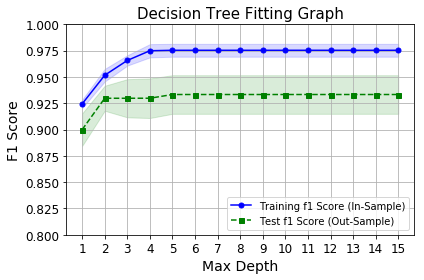

In [60]:

############################## Visualization - Fitting Graph ##############################

# Plot train f1 means of cross-validation for all the parameters C in param_range
plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training f1 Score (In-Sample)')

# Fill the area around the line to indicate the size of standard deviations of performance for the training data
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

# Plot test f1 means of cross-validation for all the parameters C in param_range
plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Test f1 Score (Out-Sample)')

# Fill the area around the line to indicate the size of standard deviations of performance for the test data
plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

# Grid and Axes Titles
plt.title('Decision Tree Fitting Graph', loc='center',fontsize=15)
#plt.suptitle('Fitting Graph', loc='center')
plt.grid()
plt.xscale('linear')
plt.legend(loc='lower right')
plt.xlabel('Max Depth')
plt.ylabel('F1 Score')
plt.xticks(np.linspace(1, 15, 15))
plt.yticks(np.linspace(0.8, 1, 9))
#plt.ylim([0.8, 1.01]) # y limits in the plot
plt.tight_layout()
# plt.savefig('Fitting_graph_LR.png', dpi=300)
plt.show()           # Display the figure

## ROC Curves 


d)	Create an ROC curve for k-NN, decision tree, and logistic regression. Discuss the results. Which classifier would you prefer to choose? Please provide screenshots of your code and explain the process you have followed.
[part d is worth 25 points in total:

5 points for correct visualization of ROC graph for kNN – use optimal kNN from part a

5 points for correct visualization of ROC graph for Decision Tree – use optimal Decision Tree from part a

5 points for correct visualization of ROC graph for Logistic Regression – use optimal Logistic Regression from part a

2 points for showing all the ROC graphs in one single plot

3 points for showing AUC estimators in the ROC graph

5 points for discussing and correctly identifying which classifier you would use]- optimal


5-fold cross validation:

ROC AUC: 0.99 (+/- 0.01) [Logistic regression]
ROC AUC: 0.95 (+/- 0.02) [Decision tree]
ROC AUC: 0.97 (+/- 0.01) [kNN]


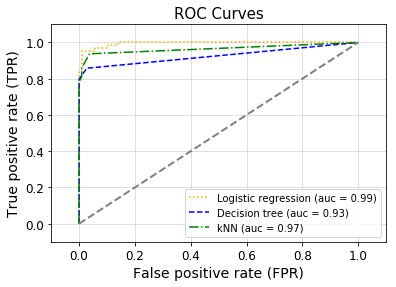

In [73]:
######################################## Classifiers ########################################

#Normalize Data
#sc = StandardScaler()
#sc.fit(X_train)
#X_train_std = sc.transform(X_train)
#X_test_std = sc.transform(X_test)
#Normalize Data
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)



# Logistic Regression Classifier
clf1 = LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# Decision Tree Classifier
clf2 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

# kNN Classifier
clf3 = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=1,
           weights='uniform')

# Label the classifiers
clf_labels = ['Logistic regression', 'Decision tree', 'kNN']
all_clf = [clf1, clf2, clf3]

#################################### Cross - Validation ####################################
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print('5-fold cross validation:\n')
# Note: We are assuming here that the data is standardized. For the homework, you need to make sure the data is standardized.
for clf, label in zip([clf1, clf2, clf3], clf_labels): #For all classifiers 
    scores = cross_val_score(estimator=clf,  #Estimate AUC based on cross validation
                             X=X, #We are using standardized dataset
                             y=y,
                             cv=5,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" #Print peformance statistics based on cross-validation
          % (scores.mean(), scores.std(), label))

##################################### Visualization ######################################

colors = [ 'orange', 'blue', 'green']      # Colors for visualization
linestyles = [':', '--', '-.', '-']        # Line styles for visualization
for clf, label, clr, ls in zip(all_clf,
               clf_labels, colors, linestyles):

    # Assuming the label of the positive class is 1 and data is normalized
    y_pred = clf.fit(X_train, #use std?
                     y_train).predict_proba(X_test)[:, 1] # Make predictions based on the classifiers
    fpr, tpr, thresholds = roc_curve(y_true=y_test, # Build ROC curve
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)                # Compute Area Under the Curve (AUC) 
    plt.plot(fpr, tpr,                         # Plot ROC Curve and create label with AUC values
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')    # Where to place the legend
plt.plot([0, 1], [0, 1], # Visualize random classifier
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])   #limits for x axis
plt.ylim([-0.1, 1.1])   #limits for y axis
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')

plt.title('ROC Curves', loc='center',fontsize=15)
#plt.savefig('ROC_all_classifiers', dpi=300)
plt.show()